# Preparation

Importing libraries to prepare for exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import KNNImputer
from scipy import stats

%matplotlib inline
sn.set(style = "whitegrid")

# Background:  
We are working with a portfolio company within the retail space. The company operates a distributed footprint of stores and while the company has successfully scaled its operation, the CEO believes that there are still inefficiencies within the system. As the business looks to expand, it is important to understand key drivers of success and potential areas to improve upon. You are the data scientist that will help to inform this understanding and in turn, drive the company’s go-forward strategy.  To help facilitate this analysis, you have been provided with historical operating data for all locations over the last year – please use only this dataset in your analysis. You are free to use any programming language to analyze this data. Please save all work and provide all code along with your response.  
 


# Exploration of data

In [2]:
locationdataset = pd.read_csv('dsmp_takehome_2020.csv')
locationdataset.head(36)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False


Checking for null entries and don't see any in the dataset.

In [3]:
locationdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location number     3996 non-null   int64  
 1   Month               3996 non-null   int64  
 2   State               3996 non-null   object 
 3   Gross revenue       3996 non-null   float64
 4   Fixed cost          3996 non-null   float64
 5   Variable cost       3996 non-null   float64
 6   Rental cost         3996 non-null   int64  
 7   Number of products  3996 non-null   int64  
 8   Owned               3996 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 253.8+ KB


Changing column names to have underscores instead of spaces

In [4]:
cols = locationdataset.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
locationdataset.columns = cols

Appending new columns/features that I think I'll need throughout the case. Columns indicate total cost per month, profit margin per month, and quarter

In [5]:
locationdataset['Total_cost'] = locationdataset.apply(lambda row: (row.Fixed_cost + row.Variable_cost + row.Rental_cost), axis = 1)
locationdataset['Profit_margin'] = locationdataset.apply(lambda row: (row.Gross_revenue - row.Total_cost)/row.Gross_revenue, axis = 1)
locationdataset['Quarter'] = locationdataset.apply(lambda row: (((row.Month-1)//3) + 1), axis = 1)

#Examining appended columns for accuracy.
locationdataset.head(24)

,Location_number,Month,State,Gross_revenue,Fixed_cost,Variable_cost,Rental_cost,Number_of_products,Owned,Total_cost,Profit_margin,Quarter
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,33862225.92,0.303650,1
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,36070471.76,0.250206,1
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,44263253.60,0.312173,1
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,33167764.47,0.278078,2
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,24820115.61,0.242398,2
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False,36363271.67,0.282451,2
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False,23068793.66,0.182406,3
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False,27974197.98,0.281892,3
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False,31571944.87,0.275921,3
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False,35674319.03,0.319272,4


In [6]:
annualdataframe = pd.pivot_table(locationdataset, index = ["Location_number"], values = ["Gross_revenue", "Total_cost", "Number_of_products"], aggfunc = {"Gross_revenue": np.sum, "Total_cost": np.sum, "Number_of_products": np.max})
annualdataframe['Profit_margin'] = annualdataframe.apply(lambda row: (row.Gross_revenue - row.Total_cost) / row.Gross_revenue, axis = 1)
print(annualdataframe)

                 Gross_revenue  Number_of_products    Total_cost  \
Location_number                                                    
1                 5.447389e+08                4452  3.946549e+08   
2                 3.559730e+08                4502  2.673863e+08   
3                 3.317718e+08                4620  2.491256e+08   
4                 2.639843e+08                4481  2.090408e+08   
5                 1.890016e+08                4533  1.493998e+08   
...                        ...                 ...           ...   
329               2.618542e+08                4426  2.029380e+08   
330               3.149292e+08                4581  2.282740e+08   
331               3.344844e+08                4641  2.462973e+08   
332               3.432639e+08                4569  2.371672e+08   
333               6.639192e+08                4478  4.819977e+08   

                 Profit_margin  
Location_number                 
1                     0.275516  
2               

# Question 1.1 & 1.2
1)	Looking across all locations, calculate the mean and median annual profit margin of a typical store. Does the profit margin across locations appear normally distributed? Please visualize.  
2)	Please plot the monthly and quarterly aggregate revenue across all stores.  


# Question 1.1 + Extra Related Analysis
Histogram on profit margin below shows a normal distribution skewed left with a thin right tail. The mean at 24.86% being lower than the median at 26.18% supports there being a left skew on the distribution. For profit margin, the left skew implies that the problems are being driven by underperformers. 

count    333.000000
mean       0.248632
std        0.062474
min       -0.010842
25%        0.212983
50%        0.261849
75%        0.293740
max        0.402023
Name: Profit_margin, dtype: float64


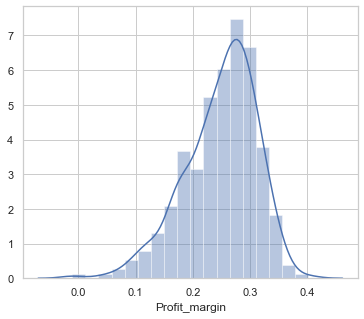

In [7]:
print(annualdataframe['Profit_margin'].describe())

plt.figure(figsize = (6,5))
sn.distplot(annualdataframe['Profit_margin'], color = 'b')

The Quantile-Quantile Plot below shows off the left skew but also shows a thin right tail. Depending on what we want to consider outliers we can see one or several low outliers. Since we want to investigate outliers further a boxplot could help here.

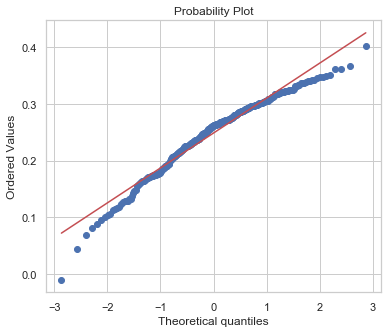

In [8]:
plt.figure(figsize = (6,5))
probplot = stats.probplot(annualdataframe['Profit_margin'], plot = sn.mpl.pyplot)

The boxplot below showcases 5 negative outliers outside of the whiskers. We'll reinvestigate in part 3 and see if imputing rent moves the distribution to the left enough to absorb some of the outliers. 

Upon investigation of the smallest profit margins, the outliers are locations 157, 313, 126, 288, and 111.

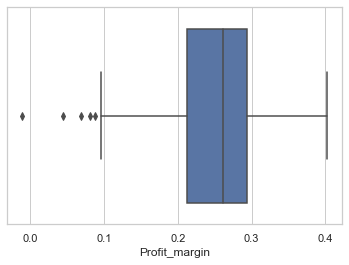

In [9]:
ax = sn.boxplot(x = annualdataframe['Profit_margin'])

In [10]:
annualdataframe.nsmallest(5, ['Profit_margin'])

,Gross_revenue,Number_of_products,Total_cost,Profit_margin
Location_number,,,,
157,8.023632e+07,3810,8.110627e+07,-0.010842
313,3.239651e+08,4074,3.095583e+08,0.044470
126,1.447712e+08,4218,1.348506e+08,0.068526
288,1.574390e+08,4231,1.447907e+08,0.080338
111,1.801838e+08,4300,1.642880e+08,0.088220


## Question 1.2: Plotting monthly/quarterly aggregate revenue across all stores.

Graph shows quarterly trend. Ramp-up in sales for the final month of every quarter. This is likely due to the nature of the financial calendar being on a 4-4-5 cycle per quarter (4 weeks, 4 weeks, 5 weeks).

Text(0.5, 1.0, 'Monthly Gross Revenue')

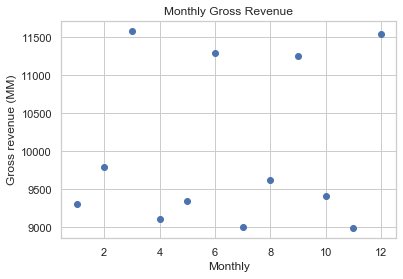

In [11]:
monthlyaggregatedf = pd.pivot_table(locationdataset, index = ["Month"], values = ["Gross_revenue"], aggfunc = [np.sum])
monthlyaggregatedf.columns = monthlyaggregatedf.columns.droplevel(0)
monthlyaggregatedf['Gross_revenue_MM'] = monthlyaggregatedf.apply(lambda row: row.Gross_revenue / 1000000, axis = 1)


plt.plot(monthlyaggregatedf["Gross_revenue_MM"], 'bo')
plt.ylabel('Gross revenue (MM)')
plt.xlabel('Monthly')
plt.title('Monthly Gross Revenue')

Sales appear to be relatively even, with Q1 bringing in around $600MM more sales.

Original graph margins were exaggerating difference between Q1 and Q2,3 & 4. I set the zoom so that it's easier to present and doesn't imply a drastic difference to the viewer. 

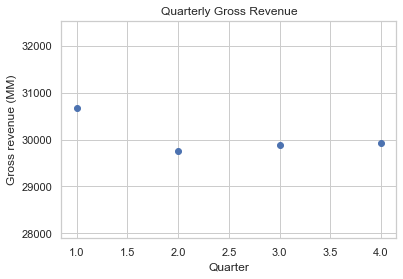

In [12]:
quarterlyaggregatedf = pd.pivot_table(locationdataset, index = ["Quarter"], values = ["Gross_revenue"], aggfunc = [np.sum])
quarterlyaggregatedf.columns = quarterlyaggregatedf.columns.droplevel(0)
quarterlyaggregatedf['Gross_revenue_MM'] = quarterlyaggregatedf.apply(lambda row: row.Gross_revenue / 1000000, axis = 1)


plt.plot(quarterlyaggregatedf["Gross_revenue_MM"], 'bo')
plt.ylabel('Gross revenue (MM)')
plt.xlabel('Quarter')
plt.title('Quarterly Gross Revenue')
plt.margins(0.05,2)


# Question 2: Imputing using KNNImputer

Ending deliverable isn't a model so imputing more than once and creating multiple different features doesn't appear to be a valuable use of time. The owned stores don't have outlier level profit margins and since the firm only owns 36 stores that's only around 10% of the portfolio. 

I think imputing with scikit-learn's K-Nearest Neighbors Imputer is a good way to utilize the features that we do have to impute for Rental Costs. Full disclosure, if I was on the job I think I would've just average imputed here.

In [13]:
annualdf = pd.pivot_table(locationdataset, index = ["Location_number", "State"], values = ["Gross_revenue", "Fixed_cost", "Variable_cost", "Rental_cost"], aggfunc = [np.sum])
annualdf.columns = annualdf.columns.droplevel(0)
annualdf

,,Fixed_cost,Gross_revenue,Rental_cost,Variable_cost
Location_number,State,,,,
1,TX,1.108956e+08,5.447389e+08,4390560,2.793687e+08
2,TX,7.287395e+07,3.559730e+08,783240,1.937291e+08
3,IL,6.429775e+07,3.317718e+08,0,1.848279e+08
4,GA,6.410409e+07,2.639843e+08,1696920,1.432398e+08
5,NJ,4.475050e+07,1.890016e+08,894000,1.037553e+08
...,...,...,...,...,...
329,TX,6.329245e+07,2.618542e+08,863640,1.387819e+08
330,GA,6.667465e+07,3.149292e+08,2699160,1.589002e+08
331,CO,7.125264e+07,3.344844e+08,735240,1.743095e+08


In [14]:
imputer = KNNImputer(missing_values = 0, n_neighbors=3, weights = 'distance')
imputedannualdf = imputer.fit_transform(annualdf)
imputedannualdf = pd.DataFrame(data=imputedannualdf)
imputedannualdf.columns = ['Fixed_cost', 'Gross_revenue', 'Rental_cost', 'Variable_cost']
imputedannualdf

,Fixed_cost,Gross_revenue,Rental_cost,Variable_cost
0,1.108956e+08,5.447389e+08,4.390560e+06,2.793687e+08
1,7.287395e+07,3.559730e+08,7.832400e+05,1.937291e+08
2,6.429775e+07,3.317718e+08,1.867824e+06,1.848279e+08
3,6.410409e+07,2.639843e+08,1.696920e+06,1.432398e+08
4,4.475050e+07,1.890016e+08,8.940000e+05,1.037553e+08
...,...,...,...,...
328,6.329245e+07,2.618542e+08,8.636400e+05,1.387819e+08
329,6.667465e+07,3.149292e+08,2.699160e+06,1.589002e+08
330,7.125264e+07,3.344844e+08,7.352400e+05,1.743095e+08
331,6.066734e+07,3.432639e+08,2.070480e+06,1.744294e+08


In [15]:
annualdf['Imputed_rental_cost'] = imputedannualdf['Rental_cost'].to_numpy().astype(int)
annualdf['Imputed_total_cost'] = annualdf.apply(lambda row: (row.Fixed_cost + row.Imputed_rental_cost + row.Variable_cost), axis = 1)
annualdf['Imputed_profit_margin'] = annualdf.apply(lambda row: (row.Gross_revenue - row.Imputed_total_cost)/row.Gross_revenue, axis = 1)
annualdf['Profit_margin'] = annualdf.apply(lambda row: (row.Gross_revenue - row.Fixed_cost - row.Rental_cost - row.Variable_cost)/row.Gross_revenue, axis = 1)
annualdf['Profit_margin_delta'] = annualdf.apply(lambda row: (row.Imputed_profit_margin - row.Profit_margin), axis = 1)
annualdf

,,Fixed_cost,Gross_revenue,Rental_cost,Variable_cost,Imputed_rental_cost,Imputed_total_cost,Imputed_profit_margin,Profit_margin,Profit_margin_delta
Location_number,State,,,,,,,,,
1,TX,1.108956e+08,5.447389e+08,4390560,2.793687e+08,4390560,3.946549e+08,0.275516,0.275516,0.000000e+00
2,TX,7.287395e+07,3.559730e+08,783240,1.937291e+08,783240,2.673863e+08,0.248858,0.248858,0.000000e+00
3,IL,6.429775e+07,3.317718e+08,0,1.848279e+08,1867824,2.509934e+08,0.243476,0.249105,-5.629845e-03
4,GA,6.410409e+07,2.639843e+08,1696920,1.432398e+08,1696920,2.090408e+08,0.208132,0.208132,0.000000e+00
5,NJ,4.475050e+07,1.890016e+08,894000,1.037553e+08,894000,1.493998e+08,0.209531,0.209531,8.326673e-17
...,...,...,...,...,...,...,...,...,...,...
329,TX,6.329245e+07,2.618542e+08,863640,1.387819e+08,863640,2.029380e+08,0.224996,0.224996,0.000000e+00
330,GA,6.667465e+07,3.149292e+08,2699160,1.589002e+08,2699160,2.282740e+08,0.275158,0.275158,-1.110223e-16
331,CO,7.125264e+07,3.344844e+08,735240,1.743095e+08,735240,2.462973e+08,0.263651,0.263651,0.000000e+00


Most of the change was rather minimal with a (.5%) profit margin drop on average when rent was imputed, and even at worst it was a (.9%) profit margin drop. With such minimal change affecting only 10.8% of the dataset I don't think it'll significantly change the old graphics that were made.

count    3.330000e+02
mean    -5.935958e-04
std      1.754635e-03
min     -8.689579e-03
25%     -5.551115e-17
50%      0.000000e+00
75%      0.000000e+00
max      1.665335e-16
Name: Profit_margin_delta, dtype: float64


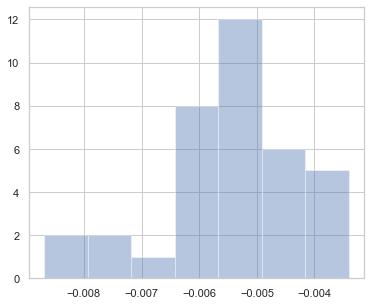

In [16]:
print(annualdf['Profit_margin_delta'].describe())

plt.figure(figsize = (6,5))
sn.distplot([i for i in annualdf['Profit_margin_delta'] if i < -0.000001e+00], color = 'b', kde = False, rug = False)

# Question 3: Quantifying drivers of success

Let's re-do the graphs with the imputed rent and see if there is any significant change. 


Looking at the description below, our imputation has skewed the graph left a little more since the mean is slightly lower but overall it appears to be pretty similar to the original. I think the original analysis still stands and the underperformers are what drive profit margin issues in the portfolio.

count    333.000000
mean       0.248039
std        0.062164
min       -0.010842
25%        0.211704
50%        0.261160
75%        0.293154
max        0.402023
Name: Imputed_profit_margin, dtype: float64


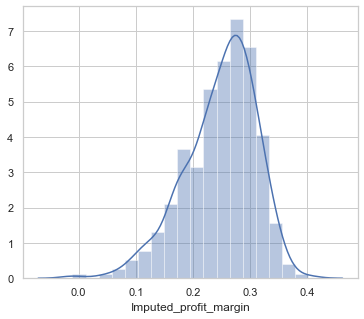

In [17]:
print(annualdf['Imputed_profit_margin'].describe())

plt.figure(figsize = (6,5))
sn.distplot(annualdf['Imputed_profit_margin'], color = 'b')

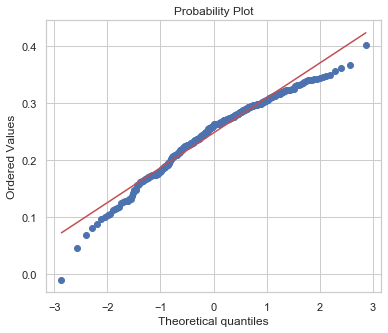

In [18]:
plt.figure(figsize = (6,5))
probplot = stats.probplot(annualdf['Imputed_profit_margin'], plot = sn.mpl.pyplot)

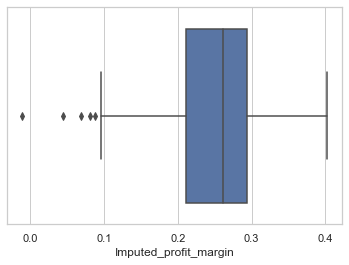

In [19]:
ax = sn.boxplot(x = annualdf['Imputed_profit_margin'])

In [20]:
annualdataframe['Imputed_profit_margin'] = annualdf['Imputed_profit_margin'].to_numpy()
annualdataframe

,Gross_revenue,Number_of_products,Total_cost,Profit_margin,Imputed_profit_margin
Location_number,,,,,
1,5.447389e+08,4452,3.946549e+08,0.275516,0.275516
2,3.559730e+08,4502,2.673863e+08,0.248858,0.248858
3,3.317718e+08,4620,2.491256e+08,0.249105,0.243476
4,2.639843e+08,4481,2.090408e+08,0.208132,0.208132
5,1.890016e+08,4533,1.493998e+08,0.209531,0.209531
...,...,...,...,...,...
329,2.618542e+08,4426,2.029380e+08,0.224996,0.224996
330,3.149292e+08,4581,2.282740e+08,0.275158,0.275158
331,3.344844e+08,4641,2.462973e+08,0.263651,0.263651


Investigating the lowest outlier, and discovering that the location with the lowest (rent-adjusted) profit margin also has the lowest number of products implied to me that the variety in the store has an effect on the profit margin. After plotting this scatter plot to try and visually see the relationship I was able to obtain this image.

I think this is a pretty powerful image to use in the powerpoint, and it helps tell the story that the number of products in the store is what drives the profit margin. This in combination with the boxplot to highlight the underperformers is enough to tell a high-level story on the issues and what can be fixed within the company.

In [21]:
annualdataframe.nsmallest(5, ['Imputed_profit_margin'])

,Gross_revenue,Number_of_products,Total_cost,Profit_margin,Imputed_profit_margin
Location_number,,,,,
157,8.023632e+07,3810,8.110627e+07,-0.010842,-0.010842
313,3.239651e+08,4074,3.095583e+08,0.044470,0.044470
126,1.447712e+08,4218,1.348506e+08,0.068526,0.068526
288,1.574390e+08,4231,1.447907e+08,0.080338,0.080338
111,1.801838e+08,4300,1.642880e+08,0.088220,0.088220


In [22]:
corr, _ = stats.pearsonr(annualdataframe['Number_of_products'], annualdataframe['Imputed_profit_margin'])
print('Pearsons correlation: %.3f' % corr)
slope, intercept, r_value, p_value, std_err = stats.linregress(annualdataframe['Number_of_products'], annualdataframe['Imputed_profit_margin'])
print('r_squared:', r_value**2)
print('std_err:', std_err)
print('p_value:', p_value)

Pearsons correlation: 0.802
r_squared: 0.6428995398548301
std_err: 1.5084015528959044e-05
p_value: 5.2931947615405965e-76


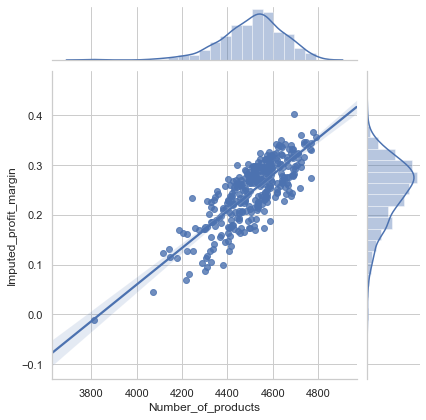

In [23]:
g = sn.jointplot(annualdataframe['Number_of_products'], annualdataframe['Imputed_profit_margin'], kind ='reg', truncate = False)

I don't see autocorrelation (model making the same mistake repeatedly), and residuals appear a little more weighted above the regeression line. Overall, I think it shows off a random pattern which supports the usage of a linear model here.

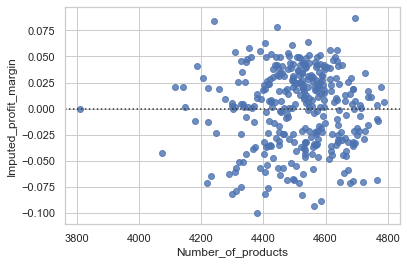

In [24]:
residualplot = sn.residplot(annualdataframe['Number_of_products'], annualdataframe['Imputed_profit_margin'])

I think it's harder to tell the cost savings story even though I can somewhat see a logarithmic relationship. I think that pitching cost cutting is generally harder because it's something everyone's probably already thought of so you might not necessarily be bringing anything new to the table even if the insight is good.

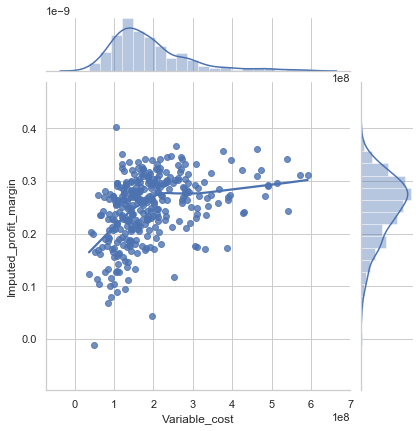

In [25]:
g = sn.jointplot(annualdf['Variable_cost'], annualdf['Imputed_profit_margin'], kind = 'reg', truncate = False, lowess = True)

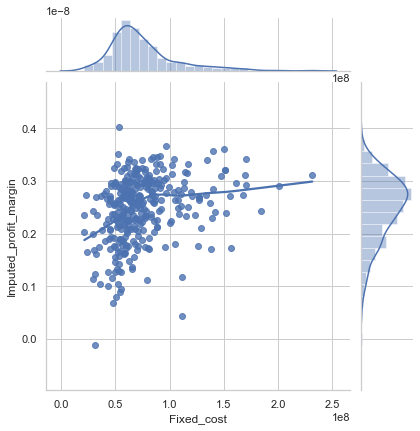

In [26]:
g = sn.jointplot(annualdf['Fixed_cost'], annualdf['Imputed_profit_margin'], kind = 'reg', truncate = False, lowess = True)

The below graphs show off the left skew in all states except Colorado & Washington. I think that you could see a left skew begin to develop if you added locations to Colorado & Washington which have relatively few locations comparatively since there's no reason that jumps out for those states bucking the trend.

Number of products is rather evenly distributed across states so you just get varying results depending on what state you're in. Overall, the strategy wouldn't change I think we should still be going for the negative outliers and improving them to the cluster.

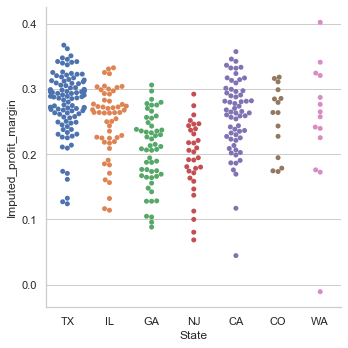

In [30]:
annualdf.reset_index(level = 1, inplace = True)
sn.catplot(x = "State", y = "Imputed_profit_margin", kind = "swarm", data = annualdf)

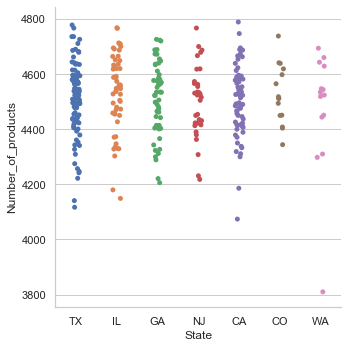

In [32]:
annualdataframe["State"] = annualdf["State"]
sn.catplot(x = "State", y = "Number_of_products", data = annualdataframe)